In [8]:
import colorsys
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from copy import deepcopy
from torchvision import transforms

In [ ]:
image = plt.imread("/opt/ml/input/data/train/processed_train_images/000001_1.jpg")
print(image.shape)
fig, ax = plt.subplots(constrained_layout = True)
#constrained_layout : figsize에 입력한 크기와 입력한 figure의 이미지의 크기를 최대한 맞추는 옵션
ax.imshow(image)
plt.show()

/opt/conda/lib/python3.8/site-packages/torchvision/transforms/functional.py:74: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /opt/conda/conda-bld/pytorch_1607370172916/work/torch/csrc/utils/tensor_numpy.cpp:141.)
  img = torch.from_numpy(pic.transpose((2, 0, 1))).contiguous()


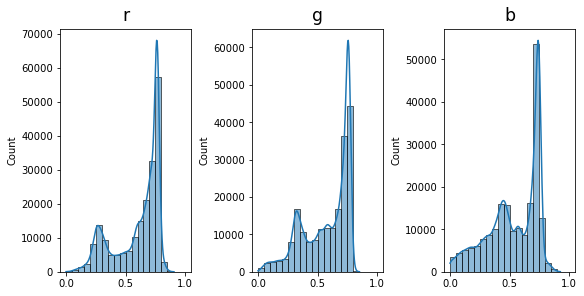

In [9]:
#이미지를 rgb에서 hls 값으로 변환하고 분포를 히스토그램으로 확인

#img_hls = np.array([colorsys.rgb_to_hls(*c) for c in (image/255).reshape((384*512, 3))]).T
#print(img_hls.shape)
transform = transforms.ToTensor()
image = transform(image).reshape(3,-1)
fig, axs = plt.subplots(ncols=3, figsize=(8, 4), constrained_layout=True)

#enumerate는 index를 함께 반환한다. 
for i, (title, ax) in enumerate(zip(["r", "g", "b"], axs)):
    sns.histplot(image[i], kde=True, bins=np.linspace(0, 1, 21), ax=ax)
    ax.set_title(title, fontsize="xx-large", pad=8)

In [ ]:
#주어진 사진에서 HLS의 heatmap 확인

fig, axs = plt.subplots(ncols=3, figsize=(8, 3), constrained_layout=True)

for i, (title, ax) in enumerate(zip(["hue", "lightness", "saturation"], axs)):
    vmax = 1 if i == 0 else 1
    im = ax.imshow(image[i].reshape(512, 384), cmap="rainbow", vmin=0, vmax=vmax)
    plt.colorbar(im, orientation="horizontal", ax=ax)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(title, fontsize="xx-large", pad=8)

In [ ]:
#내가 HLS 값을 기준으로 선택한 영역을 흰색으로 표시 (나머지 검은색)

img_hls_face = deepcopy(image)

fig, axs = plt.subplots(ncols=5, figsize=(8, 3), constrained_layout=True)

h_ths = [0.1, 0.15, 0.2, 0.3, 0.4]
for h_th, ax in zip(h_ths, axs):
    chk_face = np.where((image[2] < h_th), 1, 0)
    ax.imshow(chk_face.reshape(512, 384), cmap="gray")
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f"{h_th}", fontsize="xx-large", pad=8)

In [44]:
#np.where는 인자로 넘긴 조건을 만족하는 값의 인덱스를 반환한다. rgb는 인덱스가 3차원이기에 1차원 인덱스만 뽑아주려고 [0]를 뒤에 붙인다. 

idx_skin = np.where((img_hls_face[0] > 0.6) & (0.4 < img_hls_face[1]) & (img_hls_face[1] < 0.6))[0]
idx_hair = np.where((img_hls_face[1] < 0.3) & (img_hls_face[2] < 0.2 ))[0]
index = np.arange(512*384)
total = np.concatenate((idx_hair,idx_skin))
#피부를 인식하여 채도를 높여줌
#for idx in [x for x in index if x not in idx_hair and x not in idx_skin] :
for idx in total:
    img_hls_face[1, idx] = min(img_hls_face[1, idx]+60, 255)
print(img_hls_face.shape)
#fig, ax = plt.subplots(figsize=(8, 6), constrained_layout=True)
#ax.imshow(img_hls_face.reshape(512, 384,3))
#ax.set_xticks([])
#ax.set_yticks([])
img_hls_face = img_hls_face.reshape(3,512,384)
transform = transforms.ToPILImage()
transform(img_hls_face)

TypeError: only integer scalar arrays can be converted to a scalar index